## Explore (Exploratory Data Analysis or EDA)

What is it?

-We explore the interactions of the attributes and target variable.

-Pipeline: Plan - Acquire - Prepare - Explore - Model - Deliver


What do we care?

-Learn the vast majority of our takeaways and interesting stories from the data

-This section of the pipeline allows us to provide business insights

-This section determine which features to send into our model

## Section 1 - iris_db:



## Acquire, prepare & split your data.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


import acquire
import prepare

np.random.seed(123)

In [2]:
iris_df = acquire.get_iris_data()

this file exists, reading csv


In [3]:
iris_df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


In [5]:
iris_df.shape

(150, 7)

In [6]:
iris_df.describe()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.000000,75.500000,5.843333,3.057333,3.758000,1.199333
std,0.819232,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,1.000000,4.300000,2.000000,1.000000,0.100000
25%,1.000000,38.250000,5.100000,2.800000,1.600000,0.300000
50%,2.000000,75.500000,5.800000,3.000000,4.350000,1.300000
75%,3.000000,112.750000,6.400000,3.300000,5.100000,1.800000
max,3.000000,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_df.dtypes

species_id          int64
measurement_id      int64
sepal_length      float64
sepal_width       float64
petal_length      float64
petal_width       float64
species_name       object
dtype: object

In [8]:
iris_df.isnull().sum()

species_id        0
measurement_id    0
sepal_length      0
sepal_width       0
petal_length      0
petal_width       0
species_name      0
dtype: int64

In [9]:
iris_df.nunique()

species_id          3
measurement_id    150
sepal_length       35
sepal_width        23
petal_length       43
petal_width        22
species_name        3
dtype: int64

In [10]:
# initializing empty list 
cat_col = []
con_col = []

# for looping through all my columns 
for col in iris_df.columns:
    
    #finding all my string columns 
    print(col)
    print(iris_df[col].dtype)
    if iris_df[col].dtype == 'object':
        print('this is a string variable')
        cat_col.append(col)
    else:
        print('this is a number')
        
        #check how many unique values
        print(iris_df[col].nunique())
        if iris_df[col].nunique() < 10:
            print('treat as categorical variable')
            cat_col.append(col)
        else:
            #if it has more than 10 unique values, append to continous column variable
            con_col.append(col)
            
    print()

species_id
int64
this is a number
3
treat as categorical variable

measurement_id
int64
this is a number
150

sepal_length
float64
this is a number
35

sepal_width
float64
this is a number
23

petal_length
float64
this is a number
43

petal_width
float64
this is a number
22

species_name
object
this is a string variable



In [11]:
cat_col

['species_id', 'species_name']

In [12]:
con_col

['measurement_id',
 'sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width']

## categorical variables

species_id, 

species_name

species_id
species_id
1    50
2    50
3    50
Name: count, dtype: int64
species_id
1    0.333333
2    0.333333
3    0.333333
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


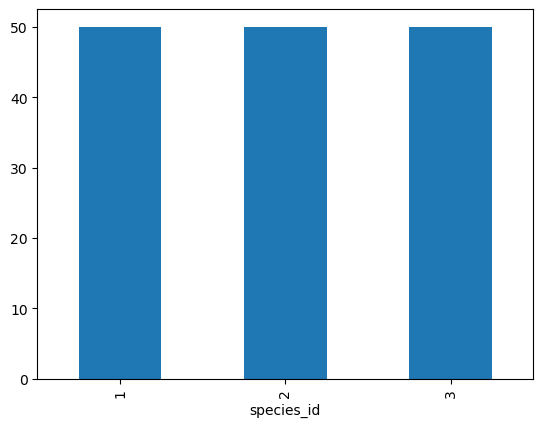


species_name
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
species_name
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


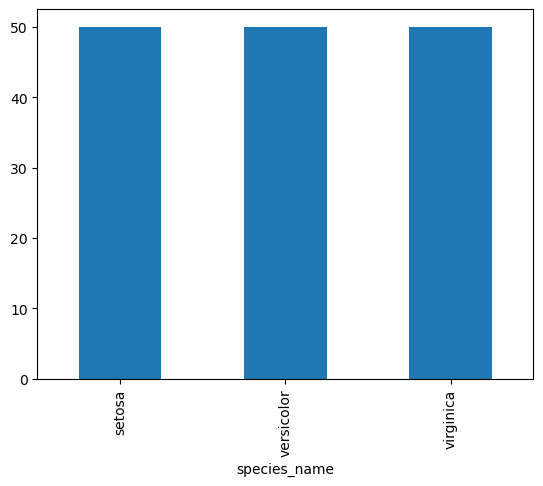

In [13]:
for col in cat_col:
    print(col)
    print(iris_df[col].value_counts())
    print(iris_df[col].value_counts(normalize= True))
    print(iris_df[col].value_counts().sort_index().plot.bar())
    plt.show()
    print()

In [14]:
con_col

['measurement_id',
 'sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width']

measurement_id
measurement_id
(0.85, 15.9]      15
(15.9, 30.8]      15
(30.8, 45.7]      15
(45.7, 60.6]      15
(60.6, 75.5]      15
(75.5, 90.4]      15
(90.4, 105.3]     15
(105.3, 120.2]    15
(120.2, 135.1]    15
(135.1, 150.0]    15
Name: count, dtype: int64


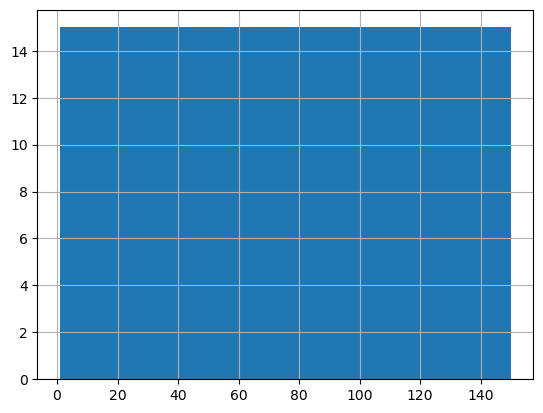

sepal_length
sepal_length
(4.295, 4.66]     9
(4.66, 5.02]     23
(5.02, 5.38]     14
(5.38, 5.74]     27
(5.74, 6.1]      22
(6.1, 6.46]      20
(6.46, 6.82]     18
(6.82, 7.18]      6
(7.18, 7.54]      5
(7.54, 7.9]       6
Name: count, dtype: int64


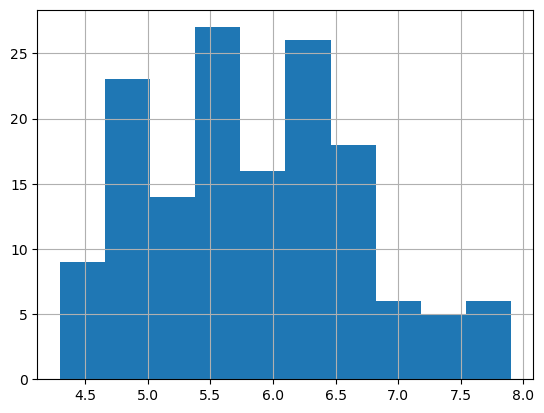

sepal_width
sepal_width
(1.997, 2.24]     4
(2.24, 2.48]      7
(2.48, 2.72]     22
(2.72, 2.96]     24
(2.96, 3.2]      50
(3.2, 3.44]      18
(3.44, 3.68]     10
(3.68, 3.92]     11
(3.92, 4.16]      2
(4.16, 4.4]       2
Name: count, dtype: int64


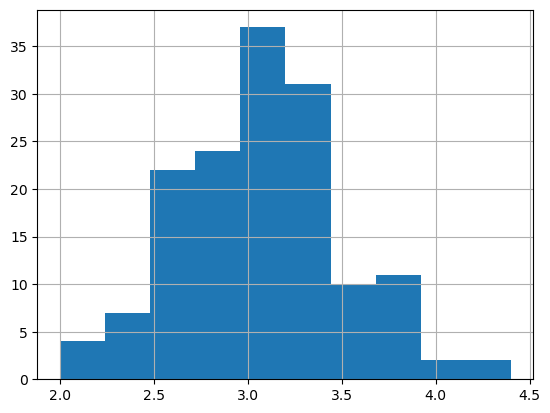

petal_length
petal_length
(0.993, 1.59]    37
(1.59, 2.18]     13
(2.18, 2.77]      0
(2.77, 3.36]      3
(3.36, 3.95]      8
(3.95, 4.54]     26
(4.54, 5.13]     29
(5.13, 5.72]     18
(5.72, 6.31]     11
(6.31, 6.9]       5
Name: count, dtype: int64


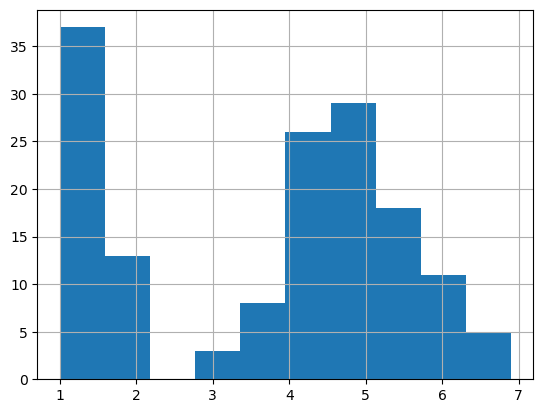

petal_width
petal_width
(0.0966, 0.34]    41
(0.34, 0.58]       8
(0.58, 0.82]       1
(0.82, 1.06]       7
(1.06, 1.3]       21
(1.3, 1.54]       20
(1.54, 1.78]       6
(1.78, 2.02]      23
(2.02, 2.26]       9
(2.26, 2.5]       14
Name: count, dtype: int64


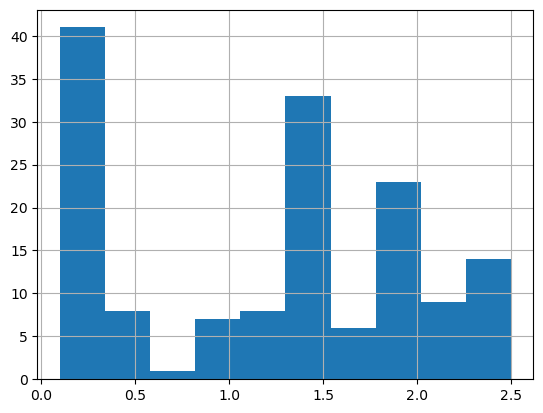

In [15]:
for col in con_col:
    print(col)
    print(iris_df[col].value_counts(bins=10).sort_index())
    iris_df[col].hist()
    plt.show()

## Prepare

In [16]:
iris_df = prepare.prep_iris(iris_df)

In [17]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [18]:
iris_df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [19]:
train_iris, validate_iris, test_iris = prepare.splitting_data(iris_df, 'species')

In [20]:
train_iris, validate_iris, test_iris = prepare.splitting_data(iris_df, 'sepal_length')

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
print(train_iris.shape)
print(validate_iris.shape)
print(test_iris.shape)

## Explore

In [21]:
train_iris.shape

(90, 5)

In [22]:
train_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
88,5.6,3.0,4.1,1.3,versicolor
123,6.3,2.7,4.9,1.8,virginica
31,5.4,3.4,1.5,0.4,setosa


does the species affect petal lenght?

In [23]:
iris_df.petal_length.value_counts()

petal_length
1.4    13
1.5    13
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7     1
3.8     1
6.6     1
6.3     1
1.0     1
6.9     1
3.6     1
6.4     1
Name: count, dtype: int64

In [24]:
iris_df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

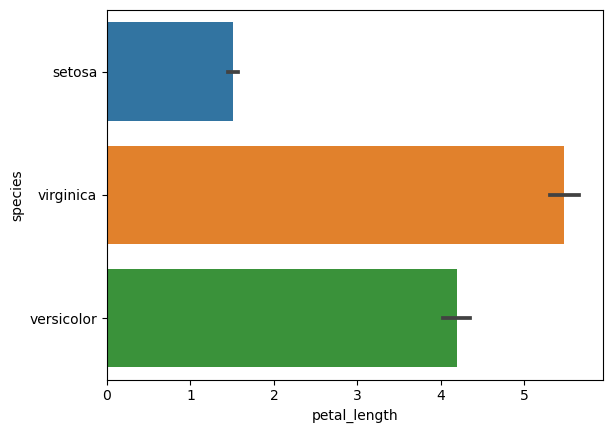

In [25]:
sns.barplot(data=train_iris, y='species', x='petal_length');

we can see that virginica has longer petal_length.

In [26]:
train_iris.species.value_counts()

species
setosa        30
virginica     30
versicolor    30
Name: count, dtype: int64

In [27]:
train_iris.petal_length.value_counts()

petal_length
1.5    8
1.4    7
5.6    6
1.6    5
4.0    5
4.5    5
5.1    5
1.7    4
4.9    3
4.2    3
3.9    3
4.7    2
4.4    2
3.5    2
5.2    2
5.7    2
1.9    2
5.4    2
1.3    2
5.5    2
4.6    2
4.1    2
6.1    1
5.0    1
3.0    1
1.1    1
5.9    1
4.8    1
6.9    1
5.3    1
5.8    1
3.7    1
6.3    1
1.2    1
4.3    1
6.4    1
Name: count, dtype: int64

hyp_n: There is NO relationship between species and petal_length
hyp_a: There is a relationship between species and petal_lenght

In [28]:
alpha = 0.05

its less than alpha reject the null hypothesis

## Is there a relationship between species and petal length

In [29]:
train_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,90.000000,90.000000,90.000000,90.000000
mean,5.781111,3.023333,3.728889,1.191111
std,0.792081,0.434741,1.710526,0.757679
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.725000,1.600000,0.325000
50%,5.700000,3.000000,4.200000,1.300000
75%,6.300000,3.375000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
observed = pd.crosstab(train_iris.species, train_iris.petal_length)
observed

petal_length,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.9,3.0,3.5,...,5.4,5.5,5.6,5.7,5.8,5.9,6.1,6.3,6.4,6.9
species,,,,,,,,,,,,,,,,,,,,,
setosa,1,1,2,7,8,5,4,2,0,0,...,0,0,0,0,0,0,0,0,0,0
versicolor,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
virginica,0,0,0,0,0,0,0,0,0,0,...,2,2,6,2,1,1,1,1,1,1


In [31]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [32]:
p

8.001953575739258e-10

In [33]:
# If the visual was unclear or we need more confirmation, run a hypothesis test
# Let's run a chi squared to compare proportions
alpha = 0.05
hyp_n = 'There is NO relationship between species and petal_length'
hyp_a = 'There is a relationship between species and petal_lenght'



if p < alpha:
    print("Reject the null hypothesis that:", hyp_n)
    print("Sufficient evidence to move forward understanding that:", hyp_a)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")


Reject the null hypothesis that: There is NO relationship between species and petal_length
Sufficient evidence to move forward understanding that: There is a relationship between species and petal_lenght


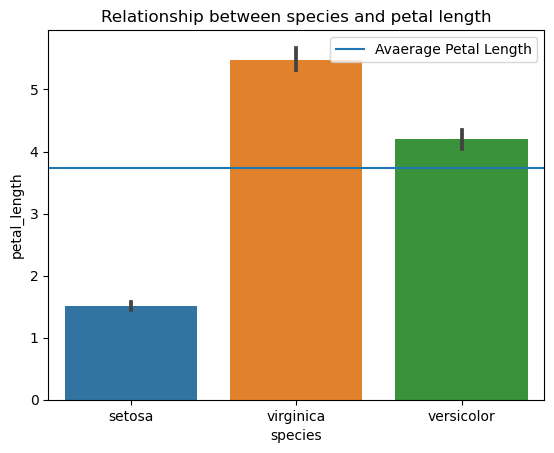

In [34]:
plt.title("Relationship between species and petal length")
sns.barplot(x="species", y="petal_length", data=train_iris)
average_petal_length = train_iris.petal_length.mean()
plt.axhline(average_petal_length, label="Avaerage Petal Length")
plt.legend()
plt.show()


Takeaway: Average petal lenght is between 3 and 4 

## is there a relationship between petal length and petal width

In [35]:
observed_2 = pd.crosstab(train_iris.petal_width, train_iris.petal_length)
observed_2

petal_length,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.9,3.0,3.5,...,5.4,5.5,5.6,5.7,5.8,5.9,6.1,6.3,6.4,6.9
petal_width,,,,,,,,,,,,,,,,,,,,,
0.1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.2,0,1,0,5,5,4,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
0.3,0,0,2,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.4,0,0,0,0,3,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
0.5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1.1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Titanic

In [36]:
titanic_df = acquire.get_titanic_data()

this file exists, reading csv


In [37]:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [38]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [39]:
titanic_df.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [40]:
titanic_df.shape

(891, 13)

In [41]:
titanic_df.nunique()

passenger_id    891
survived          2
pclass            3
sex               2
age              88
sibsp             7
parch             7
fare            248
embarked          3
class             3
deck              7
embark_town       3
alone             2
dtype: int64

In [42]:
#intializing empty lists
cat_col = []
con_col = []

#looping through all my columns
for col in titanic_df.columns:
    
    #finding all my string columns
    print(col)
    print(titanic_df[col].dtype)
    if titanic_df[col].dtype == 'object':
        print('this is a string variable')
        cat_col.append(col)
    else:
        print('this is a number')
        
        #check for how many unique values
        print(titanic_df[col].nunique())
        if titanic_df[col].nunique() < 10:
            print('treat as categorical variable')
            cat_col.append(col)
        else: 
            #if it has more than 10 unique values, append to continous column variable
            con_col.append(col)
    print()

passenger_id
int64
this is a number
891

survived
int64
this is a number
2
treat as categorical variable

pclass
int64
this is a number
3
treat as categorical variable

sex
object
this is a string variable

age
float64
this is a number
88

sibsp
int64
this is a number
7
treat as categorical variable

parch
int64
this is a number
7
treat as categorical variable

fare
float64
this is a number
248

embarked
object
this is a string variable

class
object
this is a string variable

deck
object
this is a string variable

embark_town
object
this is a string variable

alone
int64
this is a number
2
treat as categorical variable



In [43]:
cat_col

['survived',
 'pclass',
 'sex',
 'sibsp',
 'parch',
 'embarked',
 'class',
 'deck',
 'embark_town',
 'alone']

In [44]:
con_col

['passenger_id', 'age', 'fare']

survived
survived
0    549
1    342
Name: count, dtype: int64
survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


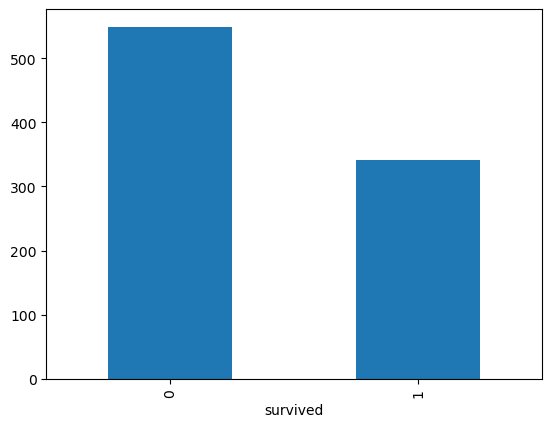

pclass
pclass
3    491
1    216
2    184
Name: count, dtype: int64
pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


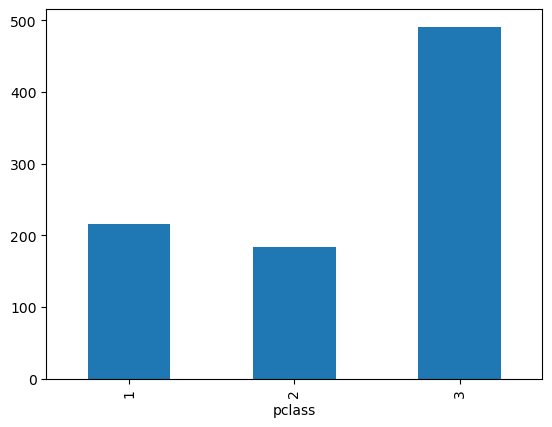

sex
sex
male      577
female    314
Name: count, dtype: int64
sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


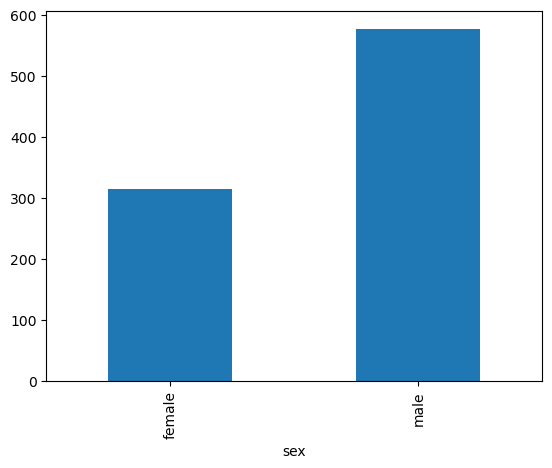

sibsp
sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
sibsp
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


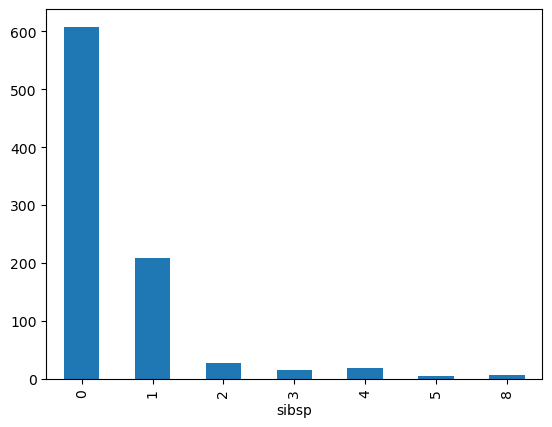

parch
parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
parch
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


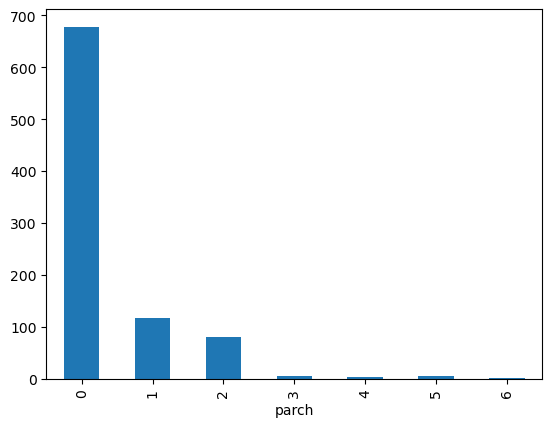

embarked
embarked
S    644
C    168
Q     77
Name: count, dtype: int64
embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


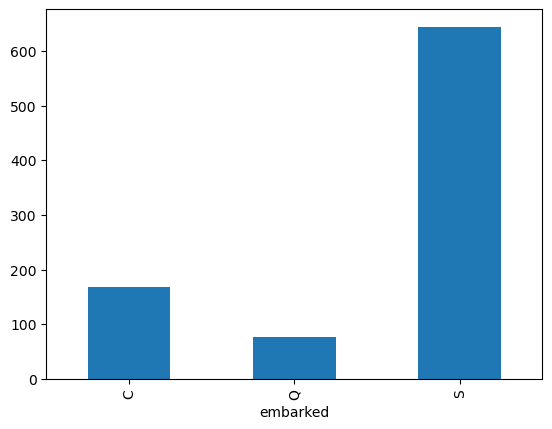

class
class
Third     491
First     216
Second    184
Name: count, dtype: int64
class
Third     0.551066
First     0.242424
Second    0.206510
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


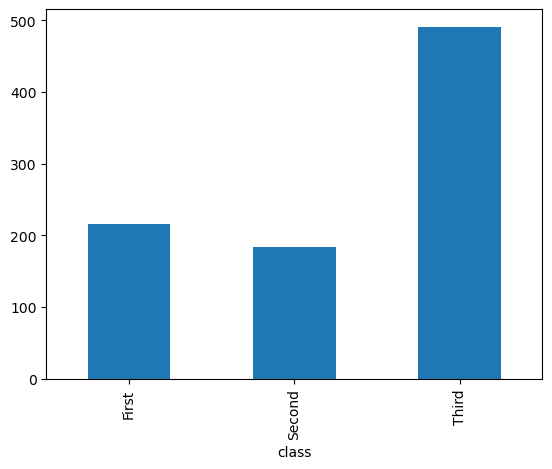

deck
deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64
deck
C    0.290640
B    0.231527
D    0.162562
E    0.157635
A    0.073892
F    0.064039
G    0.019704
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


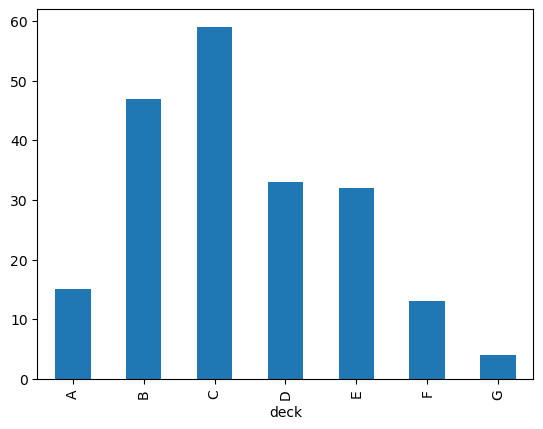

embark_town
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64
embark_town
Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


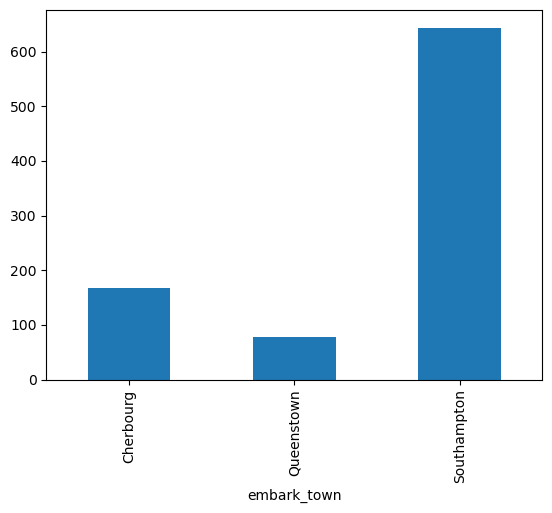

alone
alone
1    537
0    354
Name: count, dtype: int64
alone
1    0.602694
0    0.397306
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


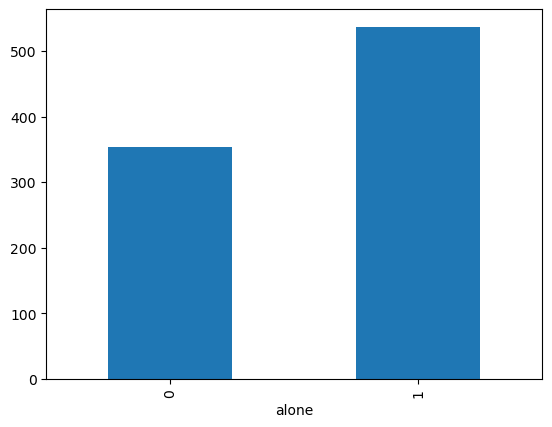

In [45]:
# catagorical

for col in cat_col:
    print(col)
    print(titanic_df[col].value_counts())
    print(titanic_df[col].value_counts(normalize=True))
    print(titanic_df[col].value_counts().sort_index().plot.bar())
    plt.show()

passenger_id
passenger_id
(-0.891, 89.0]    90
(89.0, 178.0]     89
(178.0, 267.0]    89
(267.0, 356.0]    89
(356.0, 445.0]    89
(445.0, 534.0]    89
(534.0, 623.0]    89
(623.0, 712.0]    89
(712.0, 801.0]    89
(801.0, 890.0]    89
Name: count, dtype: int64


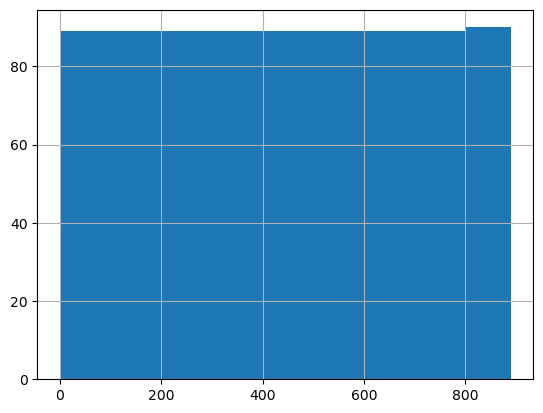

age
age
(0.339, 8.378]       54
(8.378, 16.336]      46
(16.336, 24.294]    177
(24.294, 32.252]    169
(32.252, 40.21]     118
(40.21, 48.168]      70
(48.168, 56.126]     45
(56.126, 64.084]     24
(64.084, 72.042]      9
(72.042, 80.0]        2
Name: count, dtype: int64


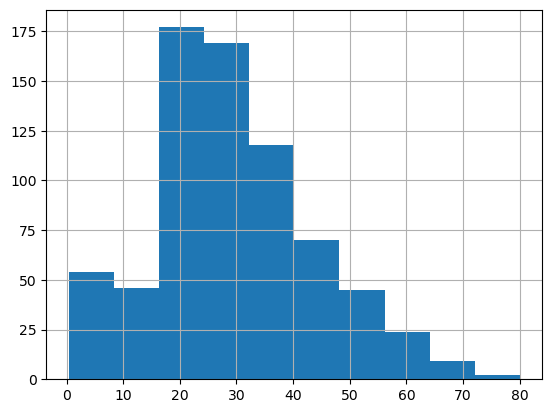

fare
fare
(-0.513, 51.233]      732
(51.233, 102.466]     106
(102.466, 153.699]     31
(153.699, 204.932]      2
(204.932, 256.165]     11
(256.165, 307.398]      6
(307.398, 358.63]       0
(358.63, 409.863]       0
(409.863, 461.096]      0
(461.096, 512.329]      3
Name: count, dtype: int64


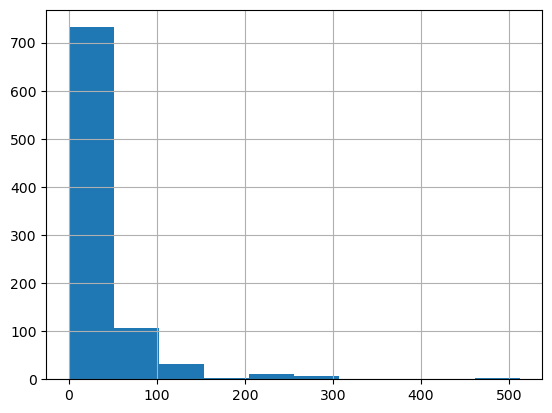

In [46]:
# numeric
for col in con_col:
    print(col)
    print(titanic_df[col].value_counts(bins=10).sort_index())
    titanic_df[col].hist()
    plt.show()


In [47]:
prepare.clean_titanic(titanic_df)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,0,3,male,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,Southampton,1
887,887,1,1,female,0,0,30.0000,Southampton,1
888,888,0,3,female,1,2,23.4500,Southampton,0
889,889,1,1,male,0,0,30.0000,Cherbourg,1


In [48]:
titanic_df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1
